## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
import glob
train_path = glob.glob("/content/drive/My Drive/Complete Projects/Cotton-Disease-Prediction-Deep-Learning-master/Dataset/Train")
valid_path = glob.glob("/content/drive/My Drive/Complete Projects/Cotton-Disease-Prediction-Deep-Learning-master/Dataset/Test")


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 0s 0us/step


In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
# useful for getting number of classes
folders = glob.glob('/content/drive/My Drive/Complete Projects/Cotton-Disease-Prediction-Deep-Learning-master/Dataset/Train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [10]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Complete Projects/Cotton-Disease-Prediction-Deep-Learning-master/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1961 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/Complete Projects/Cotton-Disease-Prediction-Deep-Learning-master/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
62/62 [==============================] - 442s 7s/step - loss: 3.4004 - accuracy: 0.3876 - val_loss: 1.3161 - val_accuracy: 0.4245
Epoch 2/20
62/62 [==============================] - 37s 593ms/step - loss: 1.1580 - accuracy: 0.5869 - val_loss: 2.1342 - val_accuracy: 0.5755
Epoch 3/20
62/62 [==============================] - 37s 593ms/step - loss: 1.0360 - accuracy: 0.6186 - val_loss: 0.9712 - val_accuracy: 0.6415
Epoch 4/20
62/62 [==============================] - 38s 605ms/step - loss: 0.8473 - accuracy: 0.6553 - val_loss: 0.9578 - val_accuracy: 0.6415
Epoch 5/20
62/62 [==============================] - 35s 570ms/step - loss: 0.8960 - accuracy: 0.6400 - val_loss: 0.9095 - val_accuracy: 0.6604
Epoch 6/20
62/62 [==============================] - 37s 598ms/step - loss: 0.8673 - accuracy: 0.6747 - val_loss: 1.2320 - val_accuracy: 0.6038
Epoch 7/20
62/62 [==============================] - 35s 571ms/step - loss: 0.7738 - accuracy: 0.7022 - val_loss: 0.9930 - val_accuracy: 0.5755
E

In [16]:
import matplotlib.pyplot as plt

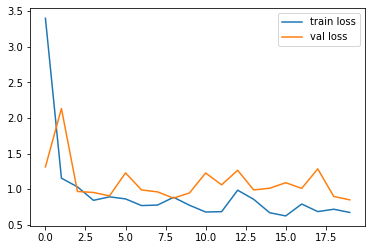

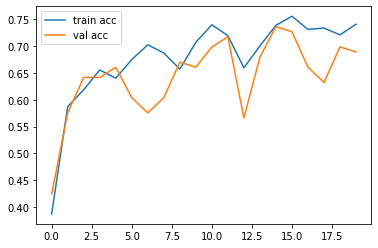

<Figure size 432x288 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('/content/drive/My Drive/Complete Projects/Cotton-Disease-Prediction-Deep-Learning-master/.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [19]:
y_pred = model.predict(test_set)

In [20]:
y_pred

array([[2.38044784e-04, 3.95931512e-01, 5.60541463e-04, 6.03269935e-01],
       [1.94725778e-03, 7.27721453e-01, 1.70076964e-04, 2.70161301e-01],
       [3.30836570e-04, 9.57373679e-01, 8.30203044e-06, 4.22871336e-02],
       [2.50660325e-03, 4.14657474e-01, 6.42799569e-05, 5.82771599e-01],
       [9.98375416e-01, 8.88525210e-06, 1.62853951e-07, 1.61551207e-03],
       [4.36405055e-02, 7.12039530e-01, 1.91094041e-01, 5.32259718e-02],
       [1.35235712e-01, 1.45059615e-01, 1.08360276e-01, 6.11344397e-01],
       [2.90724769e-04, 4.99397377e-03, 5.72915316e-01, 4.21799988e-01],
       [2.91069242e-04, 1.55075118e-01, 2.68556294e-04, 8.44365239e-01],
       [1.38376345e-04, 1.58935545e-05, 9.99492645e-01, 3.53071722e-04],
       [9.71453309e-01, 2.32814942e-02, 1.11833413e-03, 4.14691074e-03],
       [3.53604526e-04, 8.15099999e-02, 3.06524992e-01, 6.11611366e-01],
       [1.05039158e-04, 9.66894459e-06, 2.56832951e-04, 9.99628425e-01],
       [3.21999169e-03, 1.82716667e-05, 9.96730566e

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([3, 1, 1, 3, 0, 1, 3, 2, 3, 2, 0, 3, 3, 2, 3, 2, 2, 1, 2, 0, 1, 3,
       0, 3, 2, 3, 3, 3, 2, 1, 1, 3, 3, 2, 3, 3, 3, 0, 1, 2, 3, 2, 3, 1,
       2, 2, 1, 2, 3, 1, 3, 3, 3, 3, 0, 2, 1, 3, 3, 2, 3, 3, 1, 3, 2, 1,
       1, 3, 3, 1, 3, 3, 1, 2, 0, 3, 1, 3, 2, 3, 0, 3, 3, 3, 3, 1, 0, 1,
       3, 0, 3, 3, 0, 2, 0, 3, 3, 2, 1, 1, 3, 0, 1, 2, 3, 1])

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('/content/drive/My Drive/Complete Projects/Cotton-Disease-Prediction-Deep-Learning-master/model_resnet50.h5')

In [25]:
test_set

In [26]:
img=image.load_img('/content/drive/My Drive/Complete Projects/Cotton-Disease-Prediction-Deep-Learning-master/cofee leaf.jpg', target_size=(224,224))

In [27]:
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 2

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255

In [30]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
# model.predict(img_data)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)
a

array([2])

In [33]:
a==1

array([False])